In [28]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler

project_dir = "/home/julien/Documents/stage/data/MIMIC/cohorts/"
pd.set_option('display.max_columns', None)


file_name = [file for file in os.listdir(project_dir) if os.path.isfile(os.path.join(project_dir, file))][-1]
df = pd.read_csv(os.path.join(project_dir, file_name))
print(df)
df = df[df['encounter_id']==1]
print(np.unique(df["patient_id"]))
# print(len(np.unique(df[df['ards']==1]['patient_id'])))
df['row_number'] = df.groupby('patient_id').cumcount()

/tmp/ipykernel_6384/1415516369.py:11: DtypeWarning: Columns (3,4,5,8,9,10,11,12,14,15,16,19,22,24,25,26,29,32,33,37,38,41,42,44,45,46,47,48,49,50,64,66,68,70,71,72,74,75,77,79,80,81,84,86,87,92,93,94,95,97,98,99,100,103,104,105,106,109,110,113,114,115,116,118,122,124,127,128,129,130,131,132,133,134,137,141,143,145,149,150,153,155,156,157,158,161,162,183,184,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,216,220,221,222,223,224,225,226,227,228,229,234,235,236,239,240,241,243,244,245,252,253,254,255,257,267,268,271,272,273,274,275,276,277,278,279,280,285,289,290,295,297,308,310,313,315,318,319,320,321,322,330,331,332,337,338,341,342,343,344,345,346,347,352,355,356,357,358,359,362,365,366,369,370,371,372,374,375,376,377,378,381,385,386,387,388,389,390,391,392,396,397,398,399,401,402,403,404,405,406,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,428,429,430,431,432,433,438,439,440,441,442,443,447,448,450,451,452,453,454,455,456,457,458,

        patient_id  encounter_id        time Anti-Embolism [Status]  \
0              117             1    0.000000                    NaN   
1              117             1    1.433333                    NaN   
2              117             1    1.433333                    NaN   
3              117             1    1.433333                    NaN   
4              117             1    1.433333                    NaN   
...            ...           ...         ...                    ...   
158468        1245             1  109.000000                     On   
158469        1245             1  109.000000                     On   
158470        1245             1  109.000000                     On   
158471        1245             1  109.000000                     On   
158472        1245             1  109.000000                     On   

       Anti-Embolism [Device] Urine [Appearance]  Hematocrit  Admit Wt  \
0                         NaN                NaN   32.000000       NaN   

In [34]:
keys = list(df.keys())
keys
import re


FiO2 Set
FIO2 Alarm-High
FIO2 Alarm-Low
FiO2 (Analyzed)
Vision FiO2


In [29]:
df.keys()

Index(['patient_id', 'encounter_id', 'time', 'Anti-Embolism [Status]',
       'Anti-Embolism [Device]', 'Urine [Appearance]', 'Hematocrit',
       'Admit Wt', 'Glucose (70-105)', 'ALT',
       ...
       'Vision Mask', 'Incision/Wound #2', 'Inc #2 [Dressing]',
       'Inc #2 [Closure]', 'Inc #2 [Drainage]', 'Inc #2 [Status]',
       'Inc #2 [Appearance]', 'ROM [Value]', 'ROM [Type]', 'row_number'],
      dtype='object', length=654)

In [18]:
def nan_percentage(group):
    return group.isna().mean() * 100
    
nan_percentage_per_patient = df.groupby(['patient_id']).apply(nan_percentage)
nan_percentage_per_patient = nan_percentage_per_patient.add_suffix('_nan_percentage').reset_index()


df_last = df.groupby('patient_id').last().reset_index()
df_last["last_time_of_patient"] = df_last["time"]
df_last["last_row_of_patient"] = df_last["row_number"]

df = df.merge(df_last[["patient_id", "last_time_of_patient", "last_row_of_patient"]], on="patient_id")
# df["last_time_of_patient"] = df_last['time']
# df["last_row_of_patient"] = df_last['row_number']
df_nan = df_last[["patient_id", "last_time_of_patient", "last_row_of_patient"]]
df_nan = df_nan.merge(nan_percentage_per_patient, on=["patient_id"], how="left")
# df_first_ards_time[df_first_ards_time['ards_onset_row']>100].head(20)
df_nan.drop(['last_time_of_patient', 'patient_id', 'last_row_of_patient'], axis=1)
df

,patient_id,encounter_id,time,Anti-Embolism [Status],Anti-Embolism [Device],Urine [Appearance],Hematocrit,Admit Wt,Glucose (70-105),ALT,AST,Alk. Phosphate,BUN (6-20),Calcium (8.4-10.2),Carbon Dioxide,Chloride (100-112),Creatinine (0-1.3),Direct Bili (0-0.3),Hemoglobin,Magnesium (1.6-2.6),Phosphorous(2.7-4.5),Platelets,Potassium (3.5-5.3),RBC,Fingerstick Glucose,Urine [Color],Therapeutic Bed,Heart Rate,Abdominal Assessment,Support Systems,LLL Lung Sounds,RLL Lung Sounds,INV Line#1 [Site],Dorsal PedPulse [Left],LUL Lung Sounds,RUL Lung Sounds,Oral Cavity,Diet Type,Position,Temperature F,"WBC (4-11,000)",PostTib. Pulses [Left],BUN,Temperature C (calc),Activity Tolerance,PostTib. Pulses [Right],INV Line#1SiteAppear,Assistance Device,HOB,INV Line#1 [Type],Turn,calprevflg,Orientation,SpO2,Respiratory Pattern,Respiratory Rate,O2 Flow (lpm),Braden Activity,Braden Frict/Shear,Braden Mobility,Braden Moisture,Braden Nutrition,Braden Score,Braden SensoryPercep,Urine Source,GCS Total,Side Rails,Heart Rhythm,Dorsal PedPulse [Right],Temp. Site,Alarms,Parameters Checked,Glucose,Calcium,Chloride,Creatinine,Direct Bili,Magnesium,Phosphorous,Potassium,Sodium,Total Bili,WBC,Level of Conscious,Riker-SAS Scale,Verbal Response,Code Status,Ectopy Type,Eye Opening,Motor Response,Precautions,BSA,Ectopy Frequency,Service Type,Behavior,GI Prophylaxis [Drug #1],Bowel Sounds,Radiologic Study,O2 Delivery Device,Allergy 1,Diagnosis/op,Service,Admit Ht,Readmission,Marital Status,Religion,Allergy 2,Ext,Allergy 3,Sodium (135-148),Total Bili (0-1.5),"WBC (4-11,000)",Skin Integrity,Risk for Falls,Significant Events,Activity,GI Prophylaxis [Drug #2],NBP [Diastolic],Micro-Neb Treatment,NBP [Systolic],NBP Mean,ART Lumen Volume,INV#2 WaveformAppear,Inspired Gas Temp,INV#3 WaveformAppear,LCW,LCWI,INV Line#4SiteAppear,Imp Skin Cleanse #1,ImpSkin Character #1,ImpSkin Treatment #1,ImpSkin Wound Base#1,Impaired Skin Site#1,IV Site Appear #1,Access mmHg,PAP Alarm [High],PAP Alarm [Low],PainLevel Acceptable,PA line cm Mark,hi MV,Apnea Time Interval,Waveform-Vent,Weight Change,Warming [Device],TCPCV Insp. Time,System Integrity,TCPCV Insp. Pressure,LVSW,LVSWI,Nursing Consultation,bath,Temperature C,Temperature F (calc),Pain Assess Method,Respiratory Rate Set,ImpSkin #1 [Drain],ImpSkin #1 [Width],IV #1 [Site],Responds to Stimuli [Type],CVP Alarm [High],CVP Alarm [Low],Restraint Location,Blood Products,Arterial PaCO2,Arterial PaO2,Daily Weight,INR (2-4 ref. range),PT(11-13.5),PTT(22-35),Fibrinogen (150-400),LDH,Lactic Acid(0.5-2.0),Mixed Venous O2,Mixed Venous O2% Sat,Albumin (>3.2),Amylase,CPK,Differential-Bands,Differential-Basos,Differential-Eos,Differential-Lymphs,Differential-Monos,Differential-Polys,Arterial Base Excess,Arterial CO2(Calc),Arterial pH,Ionized Calcium,D-Dimer (0-500),Pain Present,INV Line#2 [Site],ETT [Location],INV Line#3 [Site],GI Intub #1 [Site],MDI #1 [Drug],MDI #2 [Drug],GI#1 Tube [Drain],INV Line#4 [Site],ImpSkin #1 [Length],ImpSkin #1 [Amount],GI Intub #2 [Site],GI [pH],Pain Location,Pain Cause,Pain Level (Rest),Pain Type,PAP Mean,PCWP,PVR,PVRI,PEEP Set,Peak Insp. Pressure,Peak Flow,Plateau Pressure,PCV Set Insp. Press,Resp Rate (Spont),Resp Rate (Total),Pain Management [Route/Status #1],PAP [Systolic],PT,PAP [Diastolic],Sputum [Amount],Sputum Consistency,Pupil Response [Left],Pupil Size [Left],Responds to Stimuli [Value],Skin Condition,Pressure Sore #1 [Heal],Pressure Sore #1 [Length],Stool [Consistency],Pressure Sore #1 [Amount],Art.pH,Cartridge/Bag Change,Initials (2 RNs) [RN #1],Med Wasted [Drug],Position Change,INV Line#2 Zero/Cal,INV Line#2SiteAppear,High Insp. Pressure,High Resp. Rate,I:E Ratio,INV Line#3 Zero/Cal,INV Line#3SiteAppear,Heparin Dose,INV Line#2 [Type],INV Line#3 [Type],INV Line#4 [Type],ABP Alarm [High],ABP Alarm [Low],C.O.(thermodilution),C.O. (fick),O2AV,O2AVI,Oral Care,ETT Position Change,ETT [Mark],Health Care Proxy,Total Protein,Readmit <48 hrs,INR,PTT,Fibrinogen,Lactic Acid,Albumin,driving pressure,D-Dimer,Uric Acid,RSBI (<

In [19]:
patient_id = 117
# print("ARDS onset at row and time :", df_first_ards_time[df_first_ards_time["patient_id"]==patient_id][["ards_onset_row", "ards_onset_time"]].to_string(header=False,index=False))
df_patient = df[df['patient_id']==patient_id]
# patient_id_first_ards_time = df_first_ards_time[df_first_ards_time["patient_id"]==patient_id]
max_nan_percentage = 10
columns_to_drop = (df_nan[df_nan["patient_id"]==patient_id].drop(['last_time_of_patient', 'patient_id', 'last_row_of_patient'], axis=1) > max_nan_percentage).to_dict(orient='records')[0]
# print(columns_to_drop)
columns_to_drop = [column_to_drop[:-15] for column_to_drop, to_drop in columns_to_drop.items() if to_drop]
# print(columns_to_drop)
print(len(columns_to_drop))
df_patient = df_patient.drop(columns_to_drop, axis=1).reset_index(drop=True)
df_patient
#columns_to_drop = df_first_ards_time[(df_first_ards_time["patient_id"]==patient_id)].column()

582


,patient_id,encounter_id,time,Anti-Embolism [Status],Anti-Embolism [Device],Urine [Appearance],Hematocrit,Admit Wt,Urine [Color],Therapeutic Bed,Heart Rate,Abdominal Assessment,Support Systems,LLL Lung Sounds,RLL Lung Sounds,INV Line#1 [Site],LUL Lung Sounds,RUL Lung Sounds,Oral Cavity,Diet Type,Position,Temperature F,Temperature C (calc),Activity Tolerance,INV Line#1SiteAppear,Assistance Device,HOB,INV Line#1 [Type],Turn,calprevflg,Orientation,SpO2,Respiratory Pattern,Respiratory Rate,O2 Flow (lpm),Braden Activity,Braden Frict/Shear,Braden Mobility,Braden Moisture,Braden Nutrition,Braden Score,Braden SensoryPercep,Urine Source,GCS Total,Side Rails,Heart Rhythm,Temp. Site,Alarms,Parameters Checked,Level of Conscious,Riker-SAS Scale,Verbal Response,Code Status,Eye Opening,Motor Response,Precautions,Service Type,Behavior,GI Prophylaxis [Drug #1],Bowel Sounds,O2 Delivery Device,Diagnosis/op,Service,Marital Status,Religion,Skin Integrity,Risk for Falls,Activity,NBP [Diastolic],NBP [Systolic],NBP Mean,row_number,last_time_of_patient,last_row_of_patient
0,117,1,0.000000,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,30.966667,937
1,117,1,1.433333,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCA,NaN,NaN,NaN,NaN,NaN,NaN,1,30.966667,937
2,117,1,1.433333,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCA,NaN,NaN,NaN,NaN,NaN,NaN,2,30.966667,937
3,117,1,1.433333,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RCA,NaN,NaN,NaN,NaN,NaN,NaN,3,30.966667,937
4,117,1,1.433333,NaN,NaN,NaN,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,RCA,NaN,NaN,NaN,NaN,NaN,NaN,4,30.966667,937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,117,1,30.966667,On,Compress Sleeves,Clear,30.6,79.5,Amber,AtmosAir Mattres,92.0,Obese,Relative,Crackles,Crackles,Right IJ,Clear,Clear,Teeth/Tissue WNL,NAS/Low Cholest,Right Side,97.900002,36.611099,Tolerated Well,WNL,1 Person Assist,30 degrees,Multi-lumen,Back,1.0,Oriented x 3,56.0,Regular,29.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Prob. Inadequate,15.0,Sl. Limited,Indwelling Cath,15.0,Side Rails Up,Normal Sinus,Oral,ON,Yes,Alert,Calm/Cooperative,5 Oriented,Full Code,4 Spontaneously,6 Obeys Commands,Universal,MICU,Calm,Proton/Pump/Inhi,Present,Nasal Cannula,LIVER FAILURE;S/P TIPS,MED,S,RCA,Intact,Yes,Bedrest,48.0,102.0,57.0,933,30.966667,937
934,117,1,30.966667,On,Compress Sleeves,Clear,30.6,79.5,Amber,AtmosAir Mattres,92.0,Obese,Relative,Crackles,Crackles,Right IJ,Clear,Clear,Teeth/Tissue WNL,NAS/Low Cholest,Right Side,97.900002,36.611099,Tolerated Well,WNL,1 Person Assist,30 degrees,Multi-lumen,Back,1.0,Oriented x 3,56.0,Regular,29.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Prob. Inadequate,15.0,Sl. Limited,Indwelling Cath,15.0,Side Rails Up,Normal Sinus,Oral,O

In [20]:
first_valid_indices = pd.DataFrame({col: df_patient[col].first_valid_index() for col in df_patient.columns}, index=[0])
first_valid_index = np.max(first_valid_indices)
print(first_valid_index)
df_patient = df_patient.iloc[first_valid_index:].reset_index()
first_valid_indices

92


,patient_id,encounter_id,time,Anti-Embolism [Status],Anti-Embolism [Device],Urine [Appearance],Hematocrit,Admit Wt,Urine [Color],Therapeutic Bed,Heart Rate,Abdominal Assessment,Support Systems,LLL Lung Sounds,RLL Lung Sounds,INV Line#1 [Site],LUL Lung Sounds,RUL Lung Sounds,Oral Cavity,Diet Type,Position,Temperature F,Temperature C (calc),Activity Tolerance,INV Line#1SiteAppear,Assistance Device,HOB,INV Line#1 [Type],Turn,calprevflg,Orientation,SpO2,Respiratory Pattern,Respiratory Rate,O2 Flow (lpm),Braden Activity,Braden Frict/Shear,Braden Mobility,Braden Moisture,Braden Nutrition,Braden Score,Braden SensoryPercep,Urine Source,GCS Total,Side Rails,Heart Rhythm,Temp. Site,Alarms,Parameters Checked,Level of Conscious,Riker-SAS Scale,Verbal Response,Code Status,Eye Opening,Motor Response,Precautions,Service Type,Behavior,GI Prophylaxis [Drug #1],Bowel Sounds,O2 Delivery Device,Diagnosis/op,Service,Marital Status,Religion,Skin Integrity,Risk for Falls,Activity,NBP [Diastolic],NBP [Systolic],NBP Mean,row_number,last_time_of_patient,last_row_of_patient
0,0,0,0,18,60,62,0,10,74,65,54,15,28,52,48,47,43,40,35,32,72,30,33,34,36,37,38,39,41,42,45,46,50,51,53,27,20,16,14,13,17,19,21,23,24,25,73,71,70,69,68,67,66,61,59,58,64,75,56,29,22,8,7,4,1,55,92,49,44,31,26,0,0,0


In [21]:
df_patient

,index,patient_id,encounter_id,time,Anti-Embolism [Status],Anti-Embolism [Device],Urine [Appearance],Hematocrit,Admit Wt,Urine [Color],Therapeutic Bed,Heart Rate,Abdominal Assessment,Support Systems,LLL Lung Sounds,RLL Lung Sounds,INV Line#1 [Site],LUL Lung Sounds,RUL Lung Sounds,Oral Cavity,Diet Type,Position,Temperature F,Temperature C (calc),Activity Tolerance,INV Line#1SiteAppear,Assistance Device,HOB,INV Line#1 [Type],Turn,calprevflg,Orientation,SpO2,Respiratory Pattern,Respiratory Rate,O2 Flow (lpm),Braden Activity,Braden Frict/Shear,Braden Mobility,Braden Moisture,Braden Nutrition,Braden Score,Braden SensoryPercep,Urine Source,GCS Total,Side Rails,Heart Rhythm,Temp. Site,Alarms,Parameters Checked,Level of Conscious,Riker-SAS Scale,Verbal Response,Code Status,Eye Opening,Motor Response,Precautions,Service Type,Behavior,GI Prophylaxis [Drug #1],Bowel Sounds,O2 Delivery Device,Diagnosis/op,Service,Marital Status,Religion,Skin Integrity,Risk for Falls,Activity,NBP [Diastolic],NBP [Systolic],NBP Mean,row_number,last_time_of_patient,last_row_of_patient
0,92,117,1,1.716667,On,Compress Sleeves,Clear,32.0,79.5,Yellow,AtmosAir Mattres,90.0,Obese,Relative,Clear,Clear,Right IJ,Clear,Clear,Teeth/Tissue WNL,Clear Liquid,Supine,98.300003,36.833302,Tolerated Well,WNL,Total Lift,45 degrees,Multi-lumen,Back,1.0,Oriented x 3,96.0,Regular,21.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Very Poor,15.0,No Impairment,Indwelling Cath,15.0,Side Rails Up,Sinus Tachy,Oral,ON,Yes,Alert,Calm/Cooperative,5 Oriented,Full Code,4 Spontaneously,6 Obeys Commands,Universal,MICU,Calm,Proton/Pump/Inhi,Hypoactive,Nasal Cannula,LIVER FAILURE;S/P TIPS,MED,S,RCA,Intact,Yes,Bedrest,58.0,90.0,68.666702,92,30.966667,937
1,93,117,1,1.966667,On,Compress Sleeves,Clear,32.0,79.5,Yellow,AtmosAir Mattres,90.0,Obese,Relative,Clear,Clear,Right IJ,Clear,Clear,Teeth/Tissue WNL,Clear Liquid,Supine,98.300003,36.833302,Tolerated Well,WNL,Total Lift,45 degrees,Multi-lumen,Back,1.0,Oriented x 3,96.0,Regular,21.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Very Poor,15.0,No Impairment,Indwelling Cath,15.0,Side Rails Up,Sinus Tachy,Oral,ON,Yes,Alert,Calm/Cooperative,5 Oriented,Full Code,4 Spontaneously,6 Obeys Commands,Universal,MICU,Calm,Proton/Pump/Inhi,Hypoactive,Nasal Cannula,LIVER FAILURE;S/P TIPS,MED,S,RCA,Intact,Yes,Bedrest,58.0,90.0,68.666702,93,30.966667,937
2,94,117,1,1.966667,On,Compress Sleeves,Clear,32.0,79.5,Yellow,AtmosAir Mattres,90.0,Obese,Relative,Clear,Clear,Right IJ,Clear,Clear,Teeth/Tissue WNL,Clear Liquid,Supine,98.300003,36.833302,Tolerated Well,WNL,Total Lift,45 degrees,Multi-lumen,Back,1.0,Oriented x 3,96.0,Regular,21.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Very Poor,15.0,No Impairment,Indwelling Cath,15.0,Side Rails Up,Sinus Tachy,Oral,ON,Yes,Alert,Calm/Cooperative,5 Oriented,Full Code,4 Spontaneously,6 Obeys Commands,Universal,MICU,Calm,Proton/Pump/Inhi,Hypoactive,Nasal Cannula,LIVER FAILURE;S/P TIPS,MED,S,RCA,Intact,Yes,Bedrest,58.0,90.0,68.666702,94,30.966667,937
3,95,117,1,1.966667,On,Compress Sleeves,Clear,32.0,79.5,Yellow,AtmosAir Mattres,90.0,Obese,Relative,Clear,Clear,Right IJ,Clear,Clear,Teeth/Tissue WNL,Clear Liquid,Supine,98.300003,36.833302,Tolerated Well,WNL,Total Lift,45 degrees,Multi-lumen,Back,1.0,Oriented x 3,96.0,Regular,21.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rarely Moist,Very Poor,15.0,No Impairment,Indwelling Cath,15.0,Side Rails Up,Normal Sinus,Oral,ON,Yes,Alert,Calm/Cooperative,5 Oriented,Full Code,4 Spontaneously,6 Obeys Commands,Universal,MICU,Calm,Proton/Pump/Inhi,Hypoactive,Nasal Cannula,LIVER FAILURE;S/P TIPS,MED,S,RCA,Intact,Yes,Bedrest,58.0,90.0,68.666702,95,30.966667,937
4,96,117,1,1.966667,On,Compress Sleeves,Clear,32.0,79.5,Yellow,AtmosAir Mattres,90.0,Obese,Relative,Clear,Clear,Right IJ,Clear,Clear,Teeth/Tissue WNL,Clear Liquid,Supine,98.300003,36.833302,Tolerated Well,WNL,Total Lift,45 degrees,Multi-lumen,Back,1.0,Oriented x 3,96.0,Regular,22.0,3.0,Bedfast,Potential Prob,Sl. Limited,Rar

In [22]:
string_columns = df_patient.select_dtypes(include=['object']).keys()
# df_patient = pd.get_dummies(df_patient, columns=string_columns)
df_patient = df_patient.drop(string_columns, axis=1)
df_patient.keys()

Index(['index', 'patient_id', 'encounter_id', 'time', 'Hematocrit', 'Admit Wt',
       'Heart Rate', 'Temperature F', 'Temperature C (calc)', 'calprevflg',
       'SpO2', 'Respiratory Rate', 'O2 Flow (lpm)', 'Braden Score',
       'GCS Total', 'NBP [Diastolic]', 'NBP [Systolic]', 'NBP Mean',
       'row_number', 'last_time_of_patient', 'last_row_of_patient'],
      dtype='object')

In [23]:
df = df_patient
df_interest_start = max(30, int(len(df)*0.01))
window_length = max(30, int(len(df)*0.1))

print(f"df_interest_start: {df_interest_start}, window_length: {window_length}")
def get_window(df, start, length):
    return 

scaler = StandardScaler()
fit_data = df_patient.iloc[df_interest_start:df_interest_start+window_length]

fit_data = scaler.fit_transform(fit_data)

df_interest_start: 30, window_length: 84


In [24]:
from sklearn.mixture import GaussianMixture
n_components = 10

gm = GaussianMixture(n_components=n_components, random_state=0).fit(fit_data)

In [25]:
import matplotlib.pyplot as plt

len_scores = len(df_patient)-window_length-df_interest_start
scores = [0]*len_scores
for i in range(len_scores):
    scores[i] = gm.score(scaler.transform(df_patient.iloc[df_interest_start+i:df_interest_start+i+window_length]))

Text(0, 0.5, 'log_likelyhood')

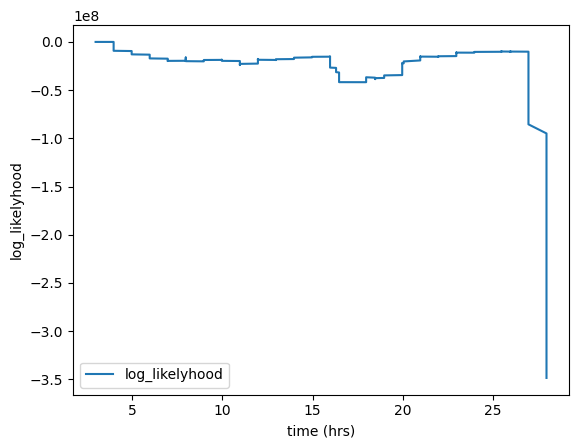

In [26]:
plt.plot(df_patient["time"].iloc[df_interest_start:-window_length], scores, label="log_likelyhood")
# plt.axvline(ards_onset_time, color="r", label="ARDS onset time")
plt.legend()
plt.xlabel("time (hrs)")
plt.ylabel("log_likelyhood")
